# Number of Clusters

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index.

In this notebook we employed the **square of the 2-norm distance**. This metric computes the mean distance of every point to its cluster.

Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [3]:
X = r.readBOW()
print(X[:10])
print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(13229, 1203)


In [4]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = 7000
tsne_bow = TSNE(n_jobs=-1, n_components=2, perplexity=500, verbose=True)
tsne_bow_result = tsne_bow.fit_transform(X[:smp_sz])

## Elbow Method --- K-means++
This methods aims to define the best number of clusters (K) by the cost function J computed during the K-means.

In [5]:
error = 0
Ks = []
Js = []
Epsilon = 1e-2
it = 1
J = 0.

k = 2
print("###############################")
while ((error > Epsilon) or (it == 1)):
    print("Number of Clusters:",k)
    print("Starting K-means++")
    cluster = KMeans(n_clusters=k,random_state=42,n_jobs=-1)
    cluster_result = cluster.fit(X)
    print("Finished")
    error = J
    J = cluster_result.inertia_ / X.shape[0]        
    print("J =",J)
    error = abs(error-J)  
    Ks.append(k)
    print("error =",error)
    Js.append(J)
    k += 10
    it += 1
    print("###############################")
    
best_K = k-10
print("\nBest k:",best_K)
print("Number of iterations:",it)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 0.972891299973188
error = 0.972891299973188
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.9281483846421542
error = 0.044742915331033806
###############################
Number of Clusters: 22
Starting K-means++
Finished
J = 0.9062573038875442
error = 0.021891080754609993
###############################
Number of Clusters: 32
Starting K-means++
Finished
J = 0.885160272786614
error = 0.021097031100930197
###############################
Number of Clusters: 42
Starting K-means++
Finished
J = 0.8667601326961517
error = 0.018400140090462314
###############################
Number of Clusters: 52
Starting K-means++
Finished
J = 0.8550275149464515
error = 0.011732617749700247
###############################
Number of Clusters: 62
Starting K-means++
Finished
J = 0.8432540728645442
error = 0.011773442081907226
###############################
Number of Clusters: 72
Starti

J  [0.972891299973188, 0.9281483846421542, 0.9062573038875442, 0.885160272786614, 0.8667601326961517, 0.8550275149464515, 0.8432540728645442, 0.8309624051407298, 0.8403950457102106]
Ks  [2, 12, 22, 32, 42, 52, 62, 72, 82]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

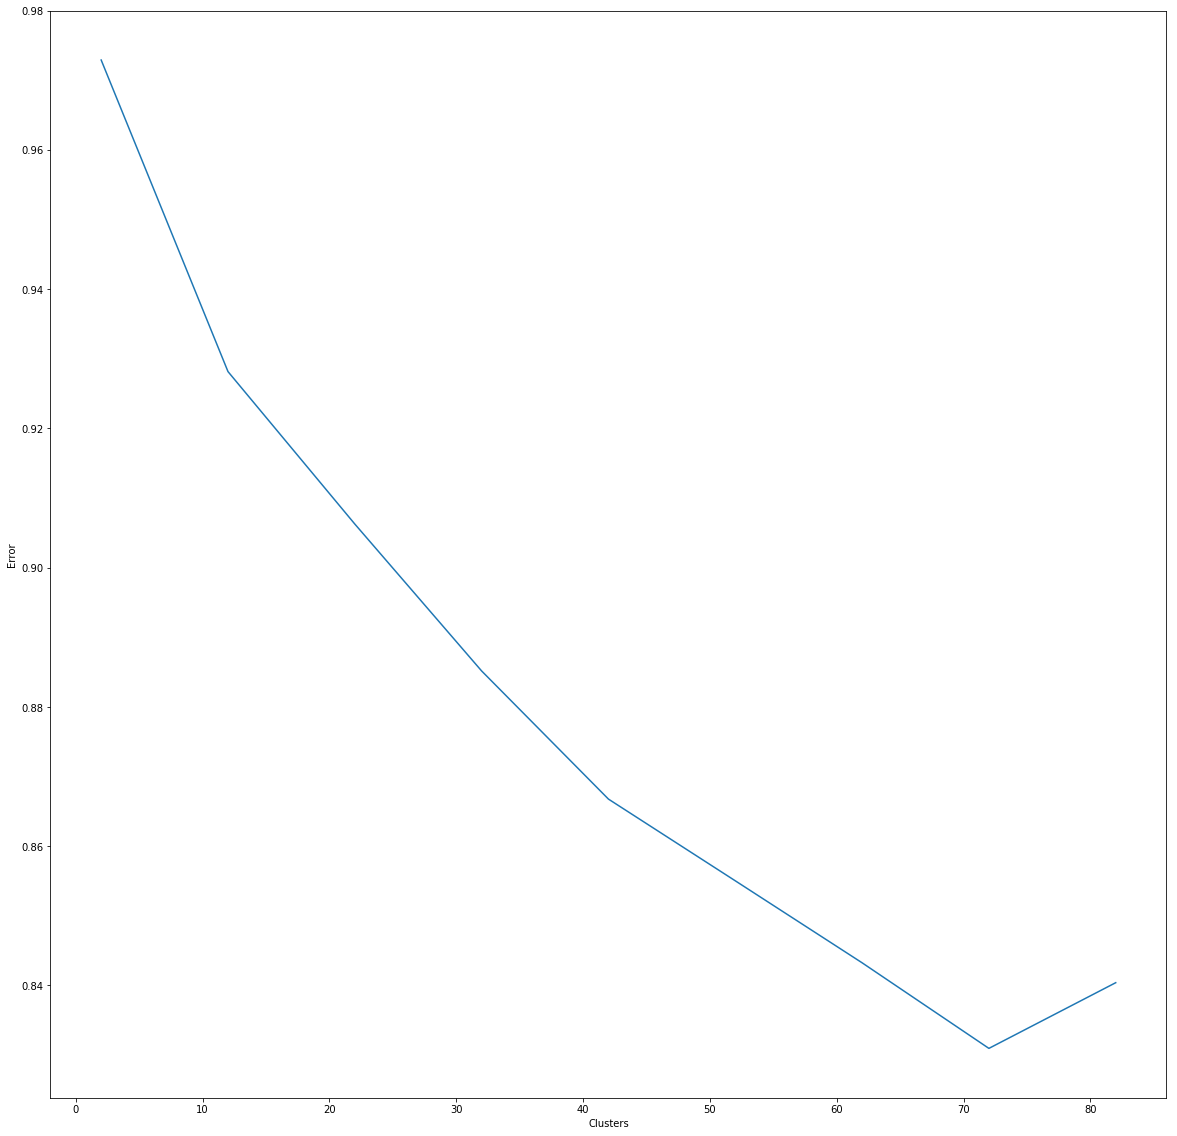

In [6]:
v.plot_cluster_errors(Ks,Js)

In [7]:
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_jobs=-1,n_clusters=best_K)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")

#############################
Best K = 82
Applying K-means
Finished
#############################


In [8]:
true_label = best_cluster_result.labels_

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

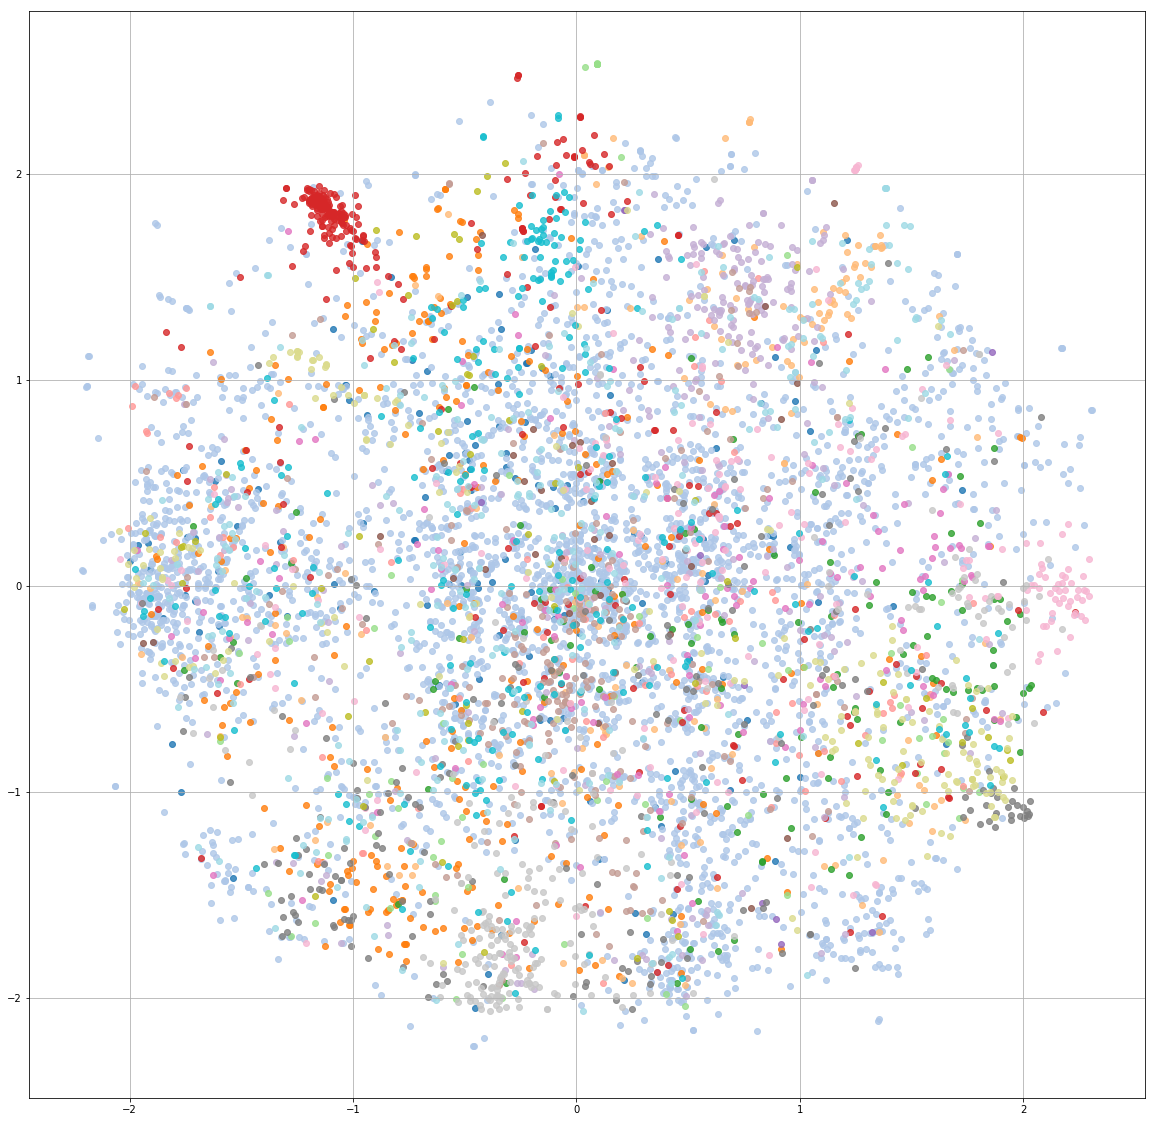

In [9]:
v.visualize_sup_scatter(tsne_bow_result, true_label[:smp_sz])

## DBSCAN
In this section we aim to define the best number of clusters (K), but this time by means of the Density-Based Spatial Clustering of Applications with Noise (DBSCAN). The DBSCAN use a proximity and density primitives to determine if a datapoint belongs to an existing cluster or if another one should be created.

In [10]:
dbscan = DBSCAN(eps=0.9,min_samples=2)
y = dbscan.fit_predict(X)

Number of clusters 772


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

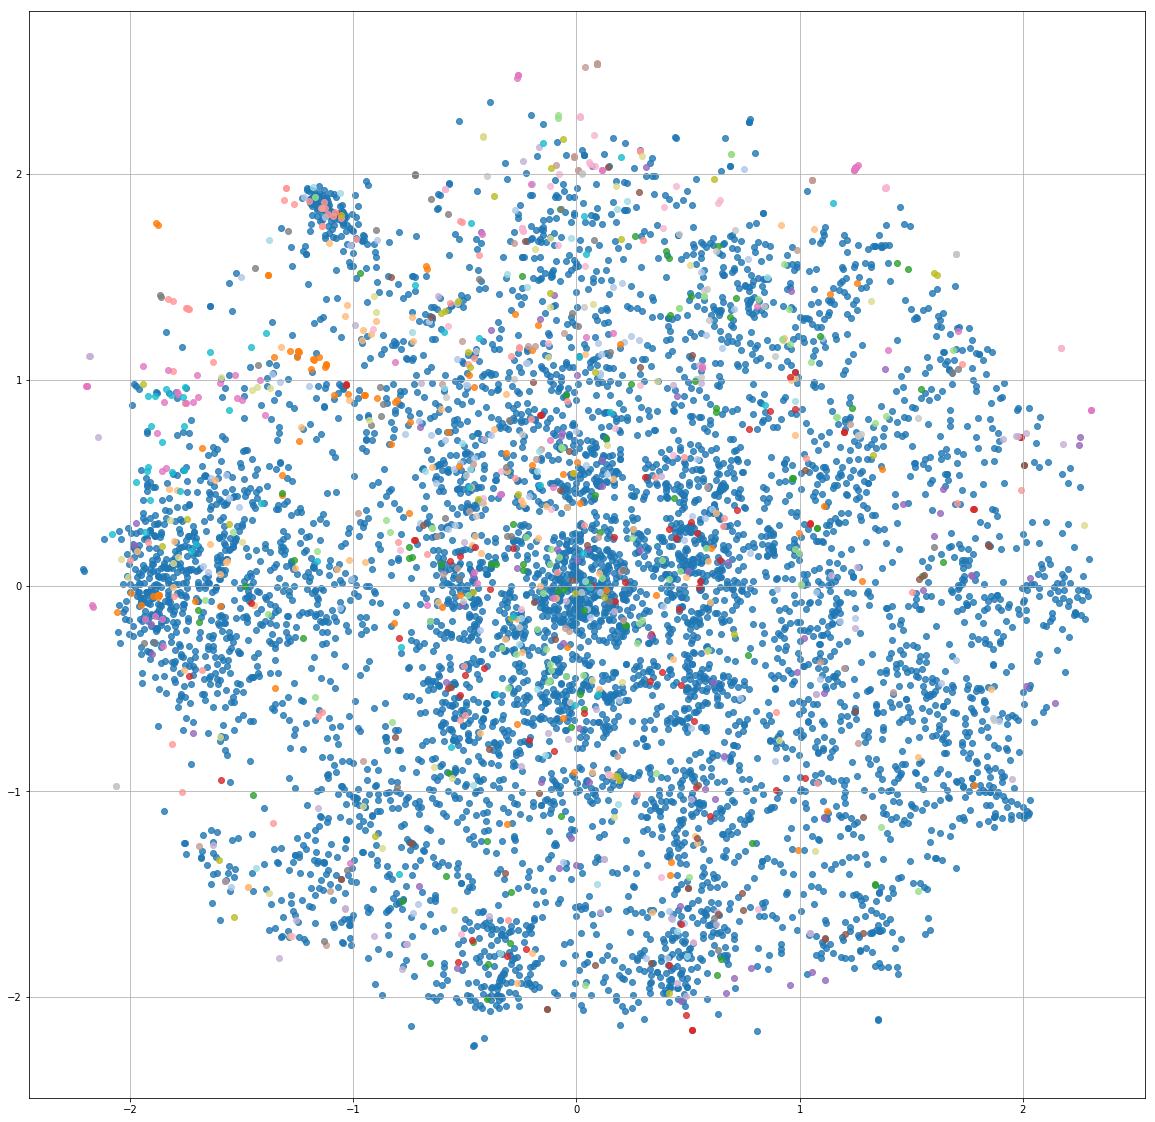

In [11]:
print("Number of clusters",len(np.unique(y)))
v.visualize_sup_scatter(tsne_bow_result, y[:smp_sz])